# Global Life Expectancy Inequality  
### A Data-Driven Structural Analysis

Life expectancy is one of the most widely used indicators of population health and socio-economic development. While global averages suggest steady improvement over time, substantial differences persist across countries and regions.

Simple comparisons of averages often fail to capture these structural disparities. This notebook explores global life expectancy data using a structured analytical approach, combining exploratory analysis, statistical validation, and clustering-based insights to better understand underlying patterns and long-term dynamics.

The goal of this analysis is not prediction alone, but interpretability — to examine how life expectancy differs across contexts and what those differences reveal about broader structural factors reflected in the data.

## Data Overview

The analysis is based on a global life expectancy dataset covering multiple countries over several years.  
Each record represents a country–year observation, enabling both cross-sectional and temporal analysis.

**Key dimensions include:**
- Life expectancy and mortality indicators  
- Socioeconomic variables  
- Immunization and disease-related indicators  
- Healthcare expenditure and demographic factors

This structure allows exploration of inequality patterns across countries as well as changes over time within the same country.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")

# Load dataset
df = pd.read_csv("/kaggle/input/global-life-expectancy-indicators-who-based/Life Expectancy Data.csv")

# Standardize column names
df.columns = df.columns.str.strip()

# Remove rows with missing target
df = df.dropna(subset=["Life expectancy"])

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio                    

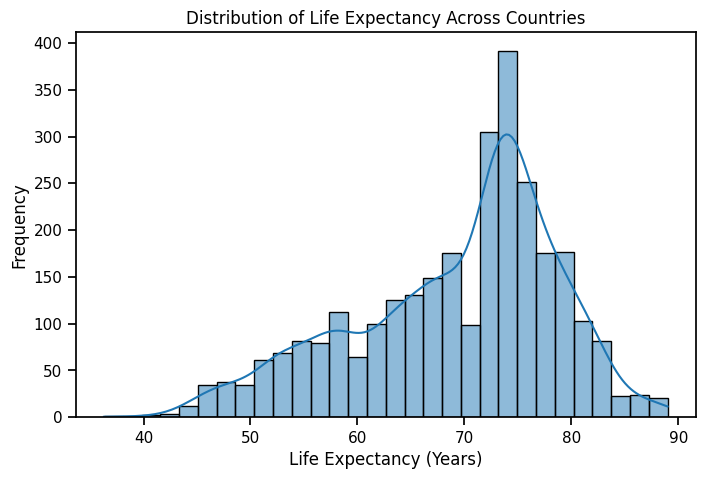

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df["Life expectancy"], bins=30, kde=True)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy Across Countries")
plt.show()

The distribution shows substantial variation in life expectancy across countries. While most observations cluster between 60 and 80 years, a non-trivial number of countries remain at significantly lower levels, highlighting persistent global inequality.

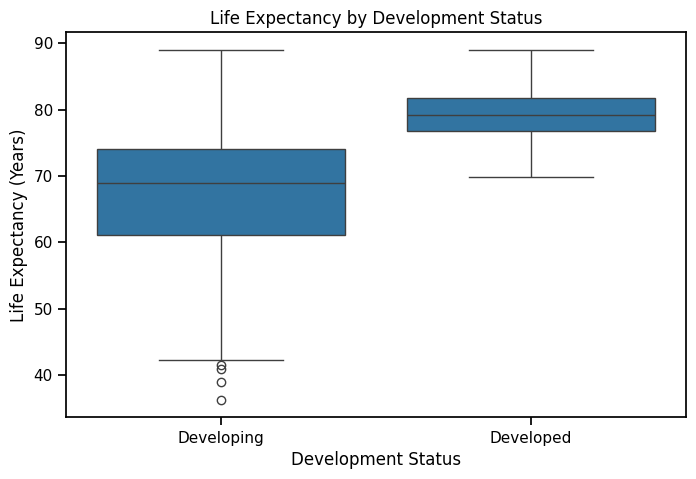

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Status", y="Life expectancy")
plt.xlabel("Development Status")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy by Development Status")
plt.show()

Developed countries exhibit higher median life expectancy with lower variability, while developing countries show both lower average outcomes and wider dispersion, suggesting uneven access to healthcare, education, and economic resources.

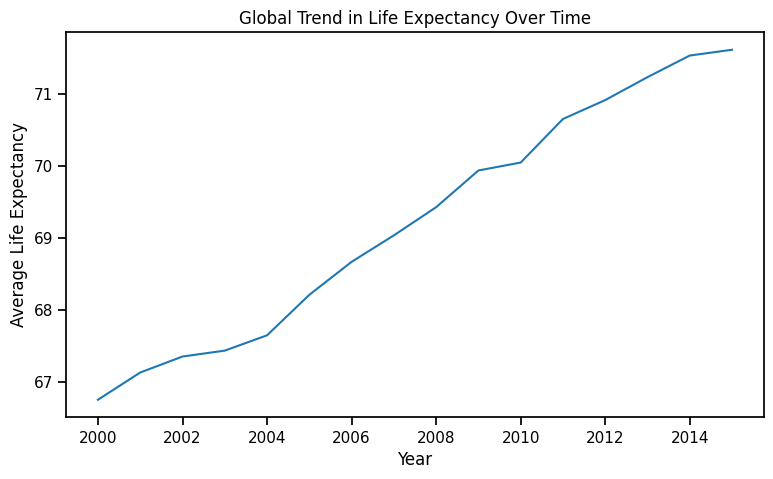

In [6]:
trend = df.groupby("Year")["Life expectancy"].mean()

plt.figure(figsize=(9,5))
plt.plot(trend.index, trend.values)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Global Trend in Life Expectancy Over Time")
plt.show()

The global average life expectancy demonstrates a steady upward trend over time. However, aggregate improvements mask substantial disparities that persist across countries.

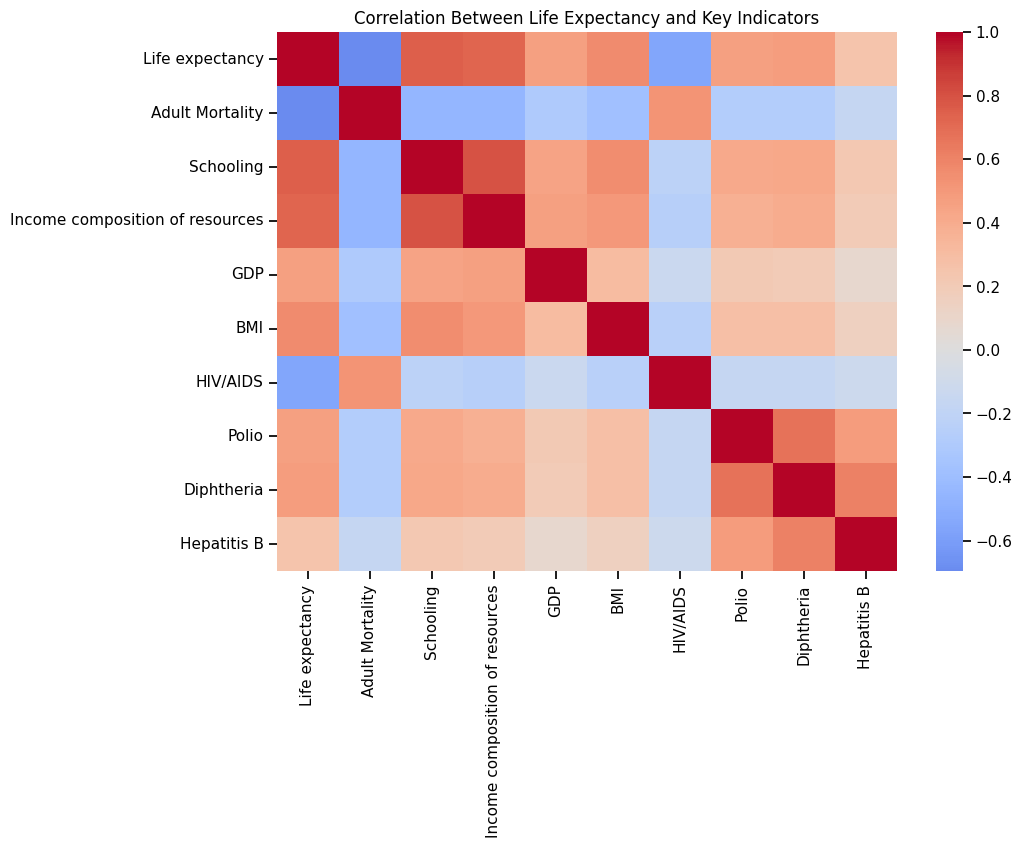

In [7]:
key_vars = [
    "Life expectancy",
    "Adult Mortality",
    "Schooling",
    "Income composition of resources",
    "GDP",
    "BMI",
    "HIV/AIDS",
    "Polio",
    "Diphtheria",
    "Hepatitis B"
]

corr = df[key_vars].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Between Life Expectancy and Key Indicators")
plt.show()

Education, income composition, immunization coverage, and disease burden show strong associations with life expectancy, indicating that longevity outcomes are primarily shaped by structural socioeconomic and public health factors rather than short-term fluctuations.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cluster_features = [
    "Life expectancy",
    "Adult Mortality",
    "Schooling",
    "Income composition of resources",
    "BMI",
    "GDP",
    "HIV/AIDS",
    "Polio",
    "Diphtheria",
    "Hepatitis B"
]

cluster_df = df[cluster_features].dropna()

scaled = StandardScaler().fit_transform(cluster_df)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

cluster_df["Cluster"] = clusters

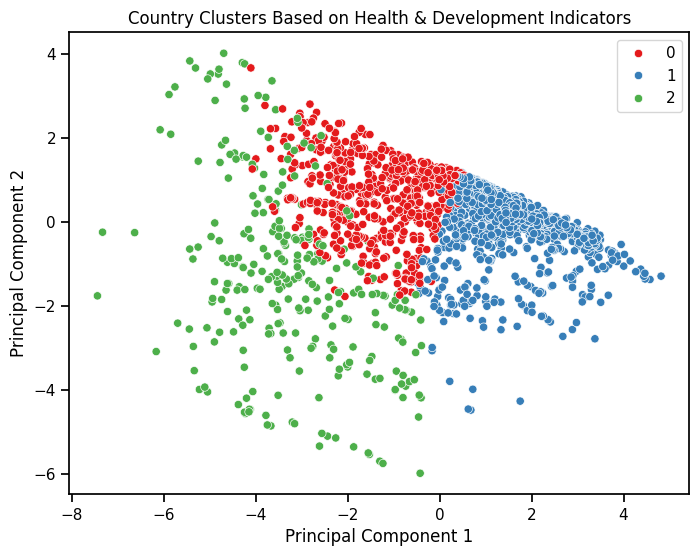

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=clusters,
    palette="Set1",
    legend="full"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Country Clusters Based on Health & Development Indicators")
plt.show()

Clustering reveals three distinct and interpretable country groups reflecting low, transitional, and high health–development profiles. These groupings align with known global patterns and provide a structured framework for comparative analysis.

## Key Takeaways

- Global life expectancy inequality is structural rather than random.
- Education, income stability, immunization, and disease control emerge as dominant drivers of longevity.
- Countries form distinct health–development clusters with systematic differences in outcomes.
- While lower-performing regions show faster relative improvement, absolute disparities persist.
- Structured, interpretable analysis provides stronger insight than aggregate averages alone.